In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../Klasifikasi/airbnb_fix.csv')
print(df.shape)
df.head()

(22552, 8)


,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood new,room_type new,neighbourhood_group new
0,-0.032433,-0.077637,2.724030,0.567676,0.512268,-1.500411,0,4
1,-0.227655,-0.126821,-0.322031,-0.250393,-0.668977,0.437255,1,6
2,0.103769,1.348680,3.403954,-0.250393,1.174101,0.512749,0,6
3,-0.186795,-0.053046,0.194712,-0.250393,1.819178,0.814723,1,10
4,-0.114154,-0.126821,4.872590,-0.250393,-0.451159,-0.720311,1,6


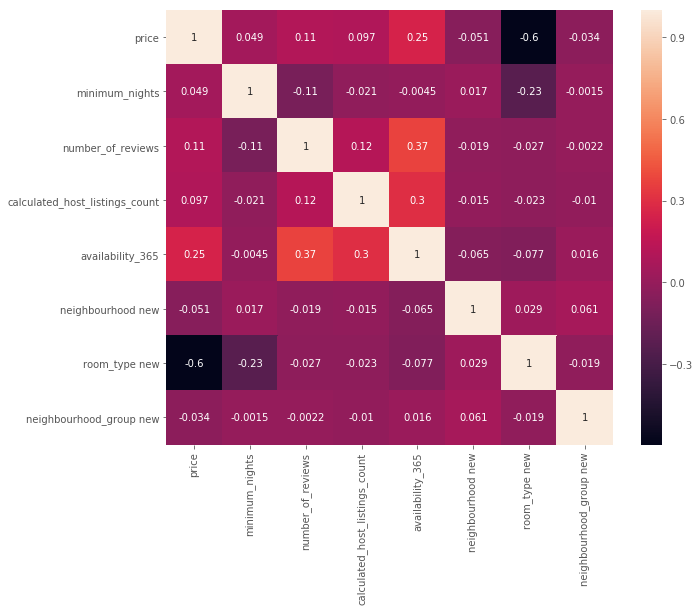

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'),annot=True)
plt.show()

In [4]:
f1 = df['availability_365'].values
f2 = df['number_of_reviews'].values
X = np.array(list(zip(f1,f2)))

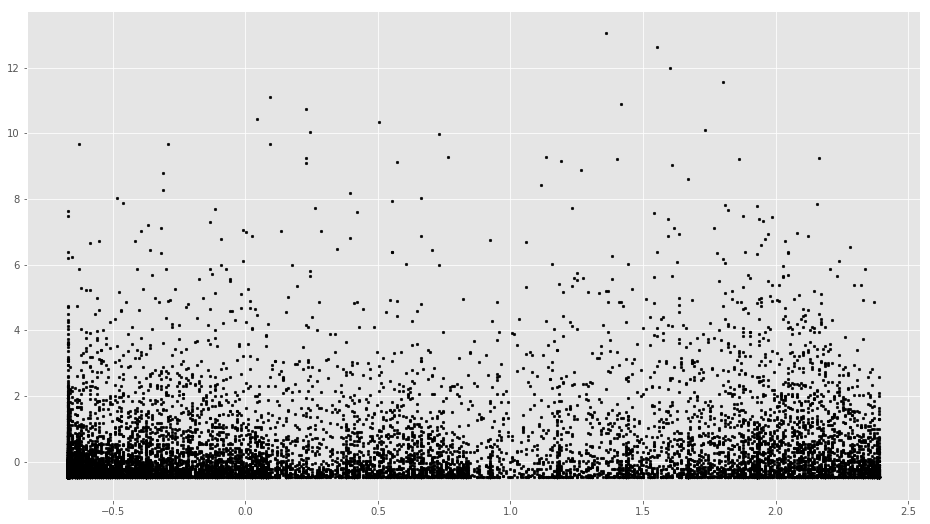

In [21]:
plt.figure(figsize=(16,9))
plt.scatter(f1,f2, c='black', s=7);
plt.show()

In [6]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [7]:
import random as rd

# Number of clusters
k = 5
centroid = np.array([]).reshape(X.shape[1],0)
for i in range(k):
    random = rd.randint(0, X.shape[0]-1)
    centroid = np.c_[centroid, X[random]]

centroid = np.transpose(centroid)

centroid

array([[-0.66897737, -0.40362143],
       [-0.52655768,  3.75751418],
       [-0.66897737, -0.48521233],
       [ 0.66306563, -0.48521233],
       [-0.11605386,  0.05872697]])

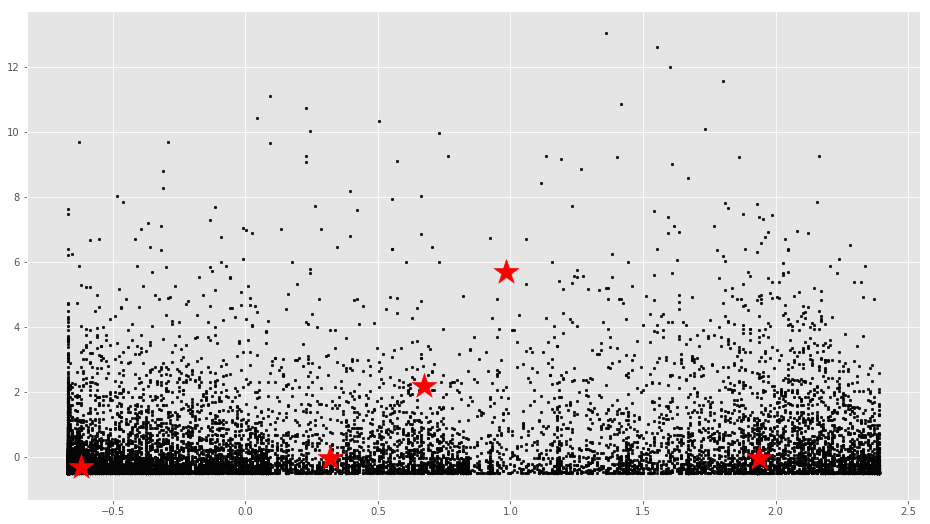

In [22]:
# Plotting along with the Centroids
plt.figure(figsize=(16,9))
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(centroid[:,0], centroid[:,1], marker='*', s=700, c='red')
plt.show()


In [9]:
centro_old = np.zeros(centroid.shape)

clusters = np.zeros(len(X))

error = dist(centroid, centro_old, None)

while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], centroid)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    centro_old = deepcopy(centroid)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        centroid[i] = np.mean(points, axis=0)
    
    error = dist(centroid, centro_old, None)

In [11]:
centroid

array([[ 0.31925237, -0.04603545],
       [ 0.98128782,  5.68733783],
       [-0.61836432, -0.31415763],
       [ 1.93805936, -0.04345513],
       [ 0.6720253 ,  2.18352753]])

In [12]:
clusters

array([4., 2., 4., ..., 2., 2., 2.])

In [13]:
error

0.0

In [14]:
data_X = pd.DataFrame(X, columns=['availability_365','number_of_reviews'])

In [15]:
data_Y = pd.DataFrame(clusters, columns=['clusters'])

In [16]:
data_asli = data_X.join(data_Y)

In [17]:
data_asli.head()

,availability_365,number_of_reviews,clusters
0,0.512268,2.724030,4.0
1,-0.668977,-0.322031,2.0
2,1.174101,3.403954,4.0
3,1.819178,0.194712,3.0
4,-0.451159,4.872590,1.0


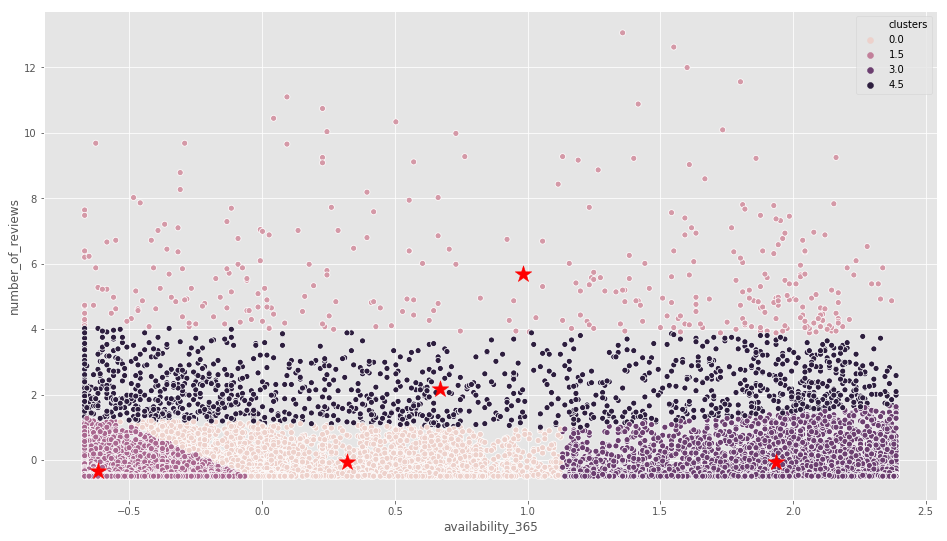

In [20]:
plt.figure(figsize=(16,9))
sns.scatterplot(data_asli['availability_365'], data_asli['number_of_reviews'], data=data_asli, hue='clusters')
plt.scatter(centroid[:,0], centroid[:,1], marker='*', s=300, c='red')
plt.show()

In [23]:
data_asli.to_csv('Clustering_airBNB.csv', index = False)